In [1]:
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
import sklearn # for model evaluation
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Other utilities
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df_reduced = pd.read_csv('fraud.csv')

In [3]:
df_reduced_shuffled = df_reduced.sample(frac=1).reset_index(drop=True)

In [4]:
df_reduced_shuffled.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df_reduced_shuffled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,142,CASH_OUT,6168077.60,C1567508562,6168077.60,0.00,C233644049,0.00,6168077.60,1,0
1,283,CASH_OUT,208152.06,C536094526,18625.00,0.00,C32157820,5666164.98,5874317.04,0,0
2,332,CASH_IN,225306.92,C2084741150,3098356.26,3323663.17,C428235199,3978817.60,3753510.68,0,0
3,258,CASH_OUT,98084.68,C1458910181,21962.00,0.00,C1024508901,1134256.80,1232341.48,0,0
4,181,PAYMENT,34870.36,C1877601011,0.00,0.00,M464718375,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18208,174,TRANSFER,1536245.52,C1831248257,1536245.52,0.00,C525486982,0.00,0.00,1,0
18209,522,CASH_OUT,1543975.74,C1183754268,1543975.74,0.00,C2139688742,273464.29,1817440.03,1,0
18210,332,PAYMENT,922.03,C920233456,0.00,0.00,M1531773566,0.00,0.00,0,0
18211,15,CASH_OUT,311045.26,C1161247823,2093.00,0.00,C1073051341,492555.11,803600.37,0,0


In [6]:
df_reduced_shuffled["isFraud"].value_counts(normalize=True)

0    0.549058
1    0.450942
Name: isFraud, dtype: float64

In [7]:
df_reduced_shuffled["type"].value_counts()

CASH_OUT    7602
TRANSFER    4915
PAYMENT     3337
CASH_IN     2300
DEBIT         59
Name: type, dtype: int64

In [8]:
df_reduced_shuffled["type"].value_counts(normalize=True)

CASH_OUT    0.417394
TRANSFER    0.269862
PAYMENT     0.183221
CASH_IN     0.126283
DEBIT       0.003239
Name: type, dtype: float64

<AxesSubplot:xlabel='type', ylabel='count'>

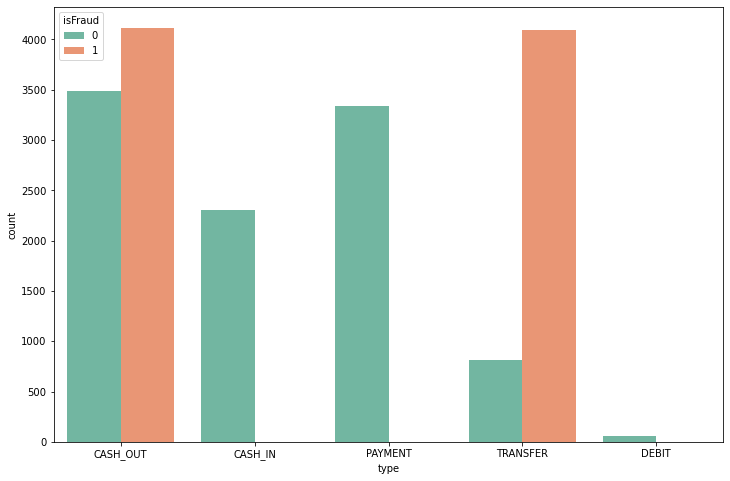

In [9]:
# counting the number of transactions per type
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df_reduced_shuffled,hue="isFraud" , palette="Set2")
# we are enable to analyse the Fraud transactions 
# as we have non fraud transactions more than fraud transactions

In [10]:
df_copy = df_reduced_shuffled.copy()
df_copy.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df_copy.drop(["step", "nameOrig", "nameDest"], axis=1, inplace=True)

In [12]:
df_copy.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_OUT,6168077.60,6168077.60,0.00,0.00,6168077.60,1,0
1,CASH_OUT,208152.06,18625.00,0.00,5666164.98,5874317.04,0,0
2,CASH_IN,225306.92,3098356.26,3323663.17,3978817.60,3753510.68,0,0
3,CASH_OUT,98084.68,21962.00,0.00,1134256.80,1232341.48,0,0
4,PAYMENT,34870.36,0.00,0.00,0.00,0.00,0,0


In [13]:
# Label Encoding the type variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy["type"] = le.fit_transform(df_copy["type"])

In [14]:
df_copy.drop(["isFlaggedFraud"], axis=1, inplace=True)

In [15]:
df_copy

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,6168077.60,6168077.60,0.00,0.00,6168077.60,1
1,1,208152.06,18625.00,0.00,5666164.98,5874317.04,0
2,0,225306.92,3098356.26,3323663.17,3978817.60,3753510.68,0
3,1,98084.68,21962.00,0.00,1134256.80,1232341.48,0
4,3,34870.36,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...
18208,4,1536245.52,1536245.52,0.00,0.00,0.00,1
18209,1,1543975.74,1543975.74,0.00,273464.29,1817440.03,1
18210,3,922.03,0.00,0.00,0.00,0.00,0
18211,1,311045.26,2093.00,0.00,492555.11,803600.37,0


In [16]:
# choosing a model to use
# we will use Logistic Regression as we have unbalanced dataset
# First we need to create a training and test set
from sklearn.model_selection import train_test_split
X = df_copy.drop("isFraud",axis=1).values
y = df_copy["isFraud"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)

decision trees, Naive Bayes or other classifiers

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### GridSearch Parameter Optimization

In [19]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

def create_model(activation='relu', neurons=8, optimizer='adam'):
    # create model
    model = Sequential(name="Model-with-All-Features")
    model.add(Input(shape=(X_train.shape[1],), name='Input-Layer'))
    model.add(Dense(neurons, activation=activation, name='Hidden-Layer'))
    model.add(Dense(1, activation='sigmoid', name='Output-Layer'))
    # Compile model
    model.compile(optimizer=optimizer, # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['accuracy', 'mse'], # List of metrics to be evaluated by the model2 during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model2 outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this model2's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your model2 cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small model2s with a large Python overhead.
             )
    return model

import numpy
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=create_model,
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model2. An epoch is an iteration over the entire x and y data provided          
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model2 will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model2 metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model2 metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          #class_weight={0 : 0.01, 1 : 0.99}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model2 to "pay more attention" to samples from an under-represented class.
          #validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          #max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          #workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          #use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
            callbacks=[callback, mc])
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 40, 60, 80, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
neurons = [1, 5, 10, 15, 20, 25, 30]


param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs, activation=activation, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

KeyboardInterrupt: 